In [2]:
import pandas as pd
import altair as alt
import altair_saver
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier

url_1 = "https://raw.githubusercontent.com/byuidatascience/data4dwellings/master/data-raw/dwellings_denver/dwellings_denver.csv"
url_2 = "https://raw.githubusercontent.com/byuidatascience/data4dwellings/master/data-raw/dwellings_ml/dwellings_ml.csv"

dat_dwell = pd.read_csv(url_1)



dat_ml = pd.read_csv(url_2)

alt.data_transformers.enable('json')


# the charts for question one can be rough.  Because its exploratory

DataTransformerRegistry.enable('json')

In [15]:
# Question One

livearea_q3_chart = (alt.Chart(dat_dwell)
    .mark_boxplot(
        size = 50
    )
    .encode(
        x = 'livearea',
        y = alt.Y('yrbuilt', scale = alt.Scale(zero=False))
    )
    .properties(
        width = 900
    )
    )

livearea_q3_chart.save('LIVEAREA_Q3_Chart.png')

In [27]:
x_train, x_test, y_train, y_test = train_test_split(dat_dwell, y, test_size = 0.34, random_state = 76)

test_df = pd.DataFrame(y_test.head(10))
test_df.reset_index(inplace=True)
final_df = test_df.rename(columns={"index":"Numbers"})
final_df.before1980.mean()

0.4

In [29]:
x_train, x_test, y_train, y_test = train_test_split(dat_dwell, y, test_size = 0.34, random_state = 76)

t_df2 = x_train.sprice

test_df2 = pd.DataFrame(t_df2.head(10))
test_df2.reset_index(inplace=True)
final_df2 = test_df2.rename(columns={"index":"Numbers"})
final_df2.sprice.mean()


2131970.0

In [4]:
# Question two

# talk about why we chose the setting we did for the ML model

# should not use yrbuilt, before1980, or parcel

# try living area, number of baths and all the arcstyles
# try a random forest classifier instead

# features
x = dat_ml.filter(['abstrprd', 'livearea', 'basement', 'stories', 'numbaths',
 'sprice', 'netprice', 'tasp', 'gartype_Att', 'arcstyle_ONE-STORY'])


# target
y = dat_ml['before1980']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.34, random_state = 76)


# create the model
classifier = RandomForestClassifier()

# train the model
classifier.fit(x_train, y_train)

# make predictions
y_predictions = classifier.predict(x_test)

# test how accurate predictions are
metrics.accuracy_score(y_test, y_predictions)


# dat_ml.columns

classifier.feature_importances_

#feature_df = pd.DataFrame(feature.x.columns, classifier.feature_importances_)

#(alt.Chart(feature_df)
#       .mark_bar()
#       .encode(
#          y = alt.Y('feature', sort = '-x'),
#          x = 'importance'
#       )

#)



ValueError: could not convert string to float: '06054-36-012-000'

In [10]:
# Grand Question 1. Create 2-3 charts that evaluate potential relationships
# between the house variables and the variable before1980
# Explain what you learn from the charts that could help a machine learning algorithm.

#gartype is good, numbaths is good, 



# 'livearea', 'stories', 'tasp', 'arcstyle_ONE-STORY'
stories_q1_chart = (alt.Chart(dat_dwell)
    .mark_boxplot(
        size = 50
    )
    .encode(
        x = alt.X('stories', scale = alt.Scale()),
        y = alt.Y('yrbuilt', scale = alt.Scale(zero=False))
    )
    .properties(
        width = 900
    )
    )


stories_q1_chart.save('STORIES_Q1_Chart.png')
# dat_ml.columns

C:\Users\mrdubya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2539
           1       0.92      0.93      0.92      4335

    accuracy                           0.90      6874
   macro avg       0.89      0.89      0.89      6874
weighted avg       0.90      0.90      0.90      6874



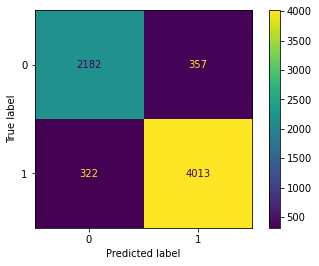

In [21]:

# Grand Question 2. Build a classification model labeling houses as being built “before 1980”
# or “during or after 1980”. Your goal is to reach 90% accuracy.
# Explain your final model choice (algorithm, tuning parameters, etc) and describe what other models you tried.



# Grand Question 3. Justify your classification model by discussing the most important features selected by your model.
# This discussion should include a chart and a description of the features.


# use "year built" instead of before 1980 in my graphs.  It will be easier.
# dat_dwell['before1980'] = dat_dwell['yrbuilt'] < 1980

# dat_dwell.columns

# Grand Question 4. Describe the quality of your classification model using 2-3 different evaluation metrics.
# You also need to explain how to interpret each of the evaluation metrics you use.


# confusion matrix?  

metrics.plot_confusion_matrix(classifier, x_test, y_test)

print(metrics.classification_report(y_test, y_predictions))

